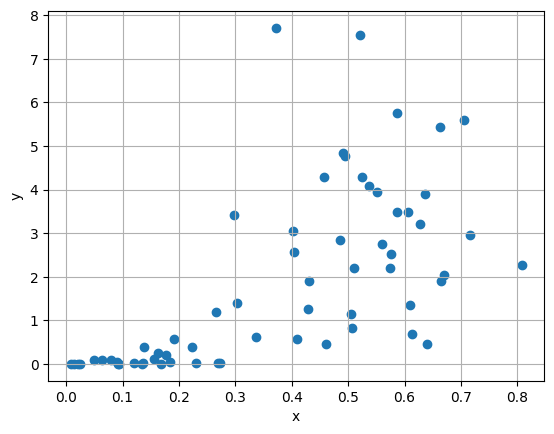

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('Carbon dioxide emissions data for subnational administrative areas in Viet Nam (1).csv')
df1 = pd.read_csv('Tree cover data for subnational administrative areas in Viet Nam (1).csv')

x = (df1['Tree coverExtentin 2018 (ha)'] + df1['Tree coverExtentin 2010 (ha)']) / 2 / df1['Totalarea (ha)']
y = df['Avg carbonemissions/year2011-18 (Mt)'] / df['Totalarea (ha)']

plt.scatter(x, y)

plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)


plt.show()

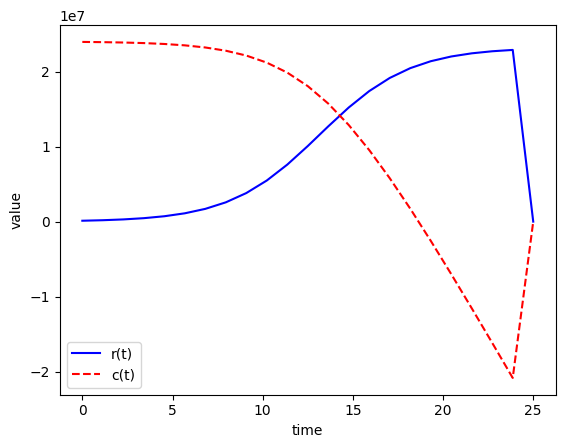

In [5]:
from scipy.integrate import odeint

df = pd.read_csv('TimeData.csv')

g = 0.4
K = 0.7 * 33169000
a =  80
alpha = 10
beta = 0.18
gamma = 0.9

def model(z, t):
    dr_dt = g * z[0] * (1 - z[0] / K)
    dc_dt = -beta * z[0] + gamma * z[1] / z[0]
    
    dz_dt = [dr_dt, dc_dt]
    
    return dz_dt

n = 22

t = np.linspace(0, 25, n + 1)
r = np.empty_like(t)
c = np.empty_like(t)

z0 = [df.loc[0, 'TreeCoverExtent'], df.loc[0, 'Co2Emission']]
r[0] = z0[0]
c[0] = z0[1]

z = FileNotFoundError
for i in range(1, n):
    tspan = [t[i - 1], t[i]]
    
    z = odeint(model, z0, tspan)
    
    r[i] = z[1][0]
    c[i] = z[1][1]
    z0 = z[1]
    
    # z[0] = [df.loc[i, 'TreeCoverExtent'], df.loc[i, 'Co2Emission']]
    # r[i] = z0[0]
    # c[i] = z0[1]
    
plt.plot(t, r, 'b-', label = 'r(t)')
plt.plot(t, c, 'r--', label = 'c(t)')
plt.ylabel('value')
plt.xlabel('time')
plt.legend(loc = 'best')
plt.show()